# NASA - Nearest Earth Objects
## A cumulative data for Nearest Earth Objects by NASA
https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

## Context
There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid

In [2]:
neo_df = pd.read_csv('neo_v2.csv')

In [3]:
neo_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
neo_df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
neo_df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
neo_df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

This is a Binary classification problem, where `hazardous` is dependent feature. Some of the features like `orbiting_body` and `sentry_object` has only category so it is not that much useful. Also features like `id` and `name` has no relevance to target variable we can remove them too.

In [8]:
neo_df.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'], inplace=True)
num_feats = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

In [9]:
neo_df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


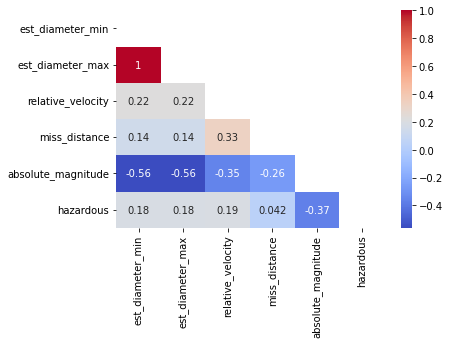

In [10]:
corr = neo_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True);

In [11]:
num_neo_df = neo_df.loc[:, num_feats]

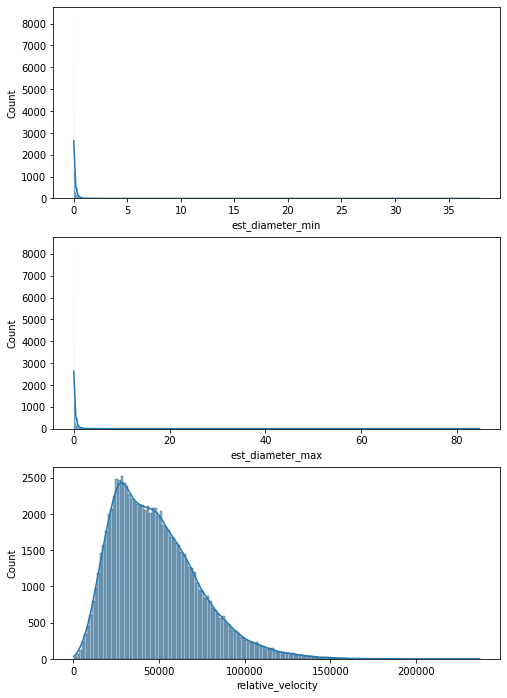

In [12]:
fig, axs = plt.subplots(nrows=3, figsize=(8,12))
sns.histplot(x='est_diameter_min', data=num_neo_df, ax=axs[0], kde=True);
sns.histplot(x='est_diameter_max', data=num_neo_df, ax=axs[1], kde=True);
sns.histplot(x='relative_velocity', data=num_neo_df, ax=axs[2], kde=True);

It can be observed from above that there exists skewness in data, in order for the model to train well we need to reduce the skewness.

In [13]:
skewness = {feat: num_neo_df[feat].skew() for feat in num_neo_df.columns}
skewness

{'est_diameter_min': 41.13995194872109,
 'est_diameter_max': 41.139951948962064,
 'relative_velocity': 0.9051249321533844,
 'miss_distance': -0.04270598169888327,
 'absolute_magnitude': -0.13741956613464948}

In [14]:
num_neo_df['est_diameter_min'] = np.log(num_neo_df['est_diameter_min'])
num_neo_df['est_diameter_max'] = np.log(num_neo_df['est_diameter_max'])
num_neo_df['relative_velocity'] = np.sqrt(num_neo_df['relative_velocity'])

In [15]:
skewness = {feat: num_neo_df[feat].skew() for feat in num_neo_df.columns}
skewness

{'est_diameter_min': 0.13741956583201068,
 'est_diameter_max': 0.1374195658374031,
 'relative_velocity': 0.1960586412667333,
 'miss_distance': -0.04270598169888327,
 'absolute_magnitude': -0.13741956613464948}

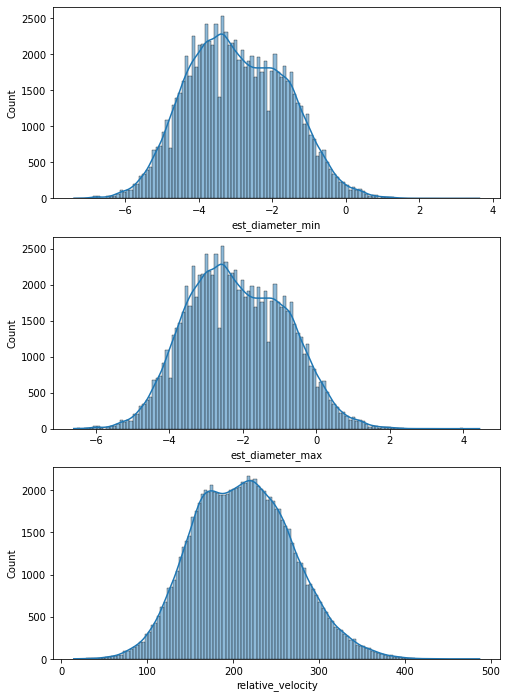

In [16]:
fig, axs = plt.subplots(nrows=3, figsize=(8,12))
sns.histplot(x='est_diameter_min', data=num_neo_df, ax=axs[0], kde=True);
sns.histplot(x='est_diameter_max', data=num_neo_df, ax=axs[1], kde=True);
sns.histplot(x='relative_velocity', data=num_neo_df, ax=axs[2], kde=True);

In [17]:
num_neo_df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.180880,0.985598,116.487120,5.483974e+07,16.73
1,-1.325011,-0.520292,271.272421,6.143813e+07,20.00
2,-0.325689,0.479030,338.021733,4.979872e+07,17.83
3,-2.338149,-1.533430,157.366779,2.543497e+07,22.20
4,-1.366458,-0.561739,206.731066,4.627557e+07,20.09


In [18]:
X, y = num_neo_df, neo_df['hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=4, test_size=0.25)

In [19]:
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipeline_lv = Pipeline([('scaler', StandardScaler()), ('lv', LinearSVC(max_iter=4000))])
pipeline_rfc = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier())])
pipeline_nc = Pipeline([('scaler', StandardScaler()), ('nc', NearestCentroid())])

In [20]:
pipeline_lr.fit(X_train, y_train)
pipeline_lv.fit(X_train, y_train)
pipeline_rfc.fit(X_train, y_train)
pipeline_nc.fit(X_train, y_train);

### Accuracy Score of Models:

In [21]:
lr_accuracy_score = pipeline_lr.score(X_test, y_test)
lv_accuracy_score = pipeline_lv.score(X_test, y_test)
rfc_accuracy_score = pipeline_rfc.score(X_test, y_test)
nc_accuracy_score = pipeline_nc.score(X_test, y_test)
print(f"Accuracy score of models ...\nLogisticRegression: {lr_accuracy_score*100:.2f}\nLinearSVC: {lv_accuracy_score*100:.2f}\nRandomForest: {rfc_accuracy_score*100:.2f}\nNearestCentroid: {nc_accuracy_score*100:.2f}")

Accuracy score of models ...
LogisticRegression: 89.55
LinearSVC: 90.22
RandomForest: 91.72
NearestCentroid: 76.86


For this problem statement accuracy is not the correct metric, since we are more concerned about `False Positive (FP)`. So for this reason we need to opt for Recall.

### Recall Score of Models:

In [22]:
lr_recall_score = recall_score(y_test, pipeline_lr.predict(X_test))
lv_recall_score = recall_score(y_test, pipeline_lv.predict(X_test))
rfc_recall_score = recall_score(y_test, pipeline_rfc.predict(X_test))
nc_recall_score = recall_score(y_test, pipeline_nc.predict(X_test))
print(f"Recall score of models ...\nLogisticRegression: {lr_recall_score*100:.2f}\nLinearSVC: {lv_recall_score*100:.2f}\nRandomForest: {rfc_recall_score*100:.2f}\nNearestCentroid: {nc_recall_score*100:.2f}")

Recall score of models ...
LogisticRegression: 7.59
LinearSVC: 1.55
RandomForest: 40.60
NearestCentroid: 95.34
